In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
import seaborn as sns
import matplotlib.transforms as mtrans
from collections import OrderedDict

In [22]:
root_dir = "/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/"
models = {'Rotation': '2023-11-29/', 'Translation': '2024-01-17/'}
embeddings = 'dHCP_embeddings'
labels=['Preterm_28', 'Preterm_32', 'Preterm_37']
target = 'train_val_values.json'
metric = 'train_val_auc'

cols = ['Prematurity Class', 'Augmentation', 'AUC']
palette={'Rotation': 'darkred',
         'Translation': 'darkgreen'}

In [131]:
dict_values = {label : {key: [] for key in models.keys()} for label in labels}

In [132]:
for key, model in models.items():
    models_dirs = os.path.join(root_dir,model)
    for label in labels:
        selected_models_dirs = [root for root, dirs, files in os.walk(models_dirs)
                                    if (target in files) & (label in root) & ('best_model' not in root)]
        print(f'{label}, {key}: {selected_models_dirs}')
        values = []
        for directory in selected_models_dirs:
            with open(os.path.join(directory,target), 'r') as f:
                perf = json.load(f)
                value = perf[metric][0]
                values.append(value)
        dict_values[label][key]=values
        

Preterm_28, Rotation: ['/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/2023-11-29/15-49-36_2/dHCP_embeddings/Preterm_28', '/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/2023-11-29/15-49-36_1/dHCP_embeddings/Preterm_28', '/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/2023-11-29/09-59-38_188/dHCP_embeddings/Preterm_28', '/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/2023-11-29/15-49-36_0/dHCP_embeddings/Preterm_28']
Preterm_32, Rotation: ['/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/2023-11-29/15-49-36_2/dHCP_embeddings/Preterm_32', '/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/2023-11-29/15-49-36_1/dHCP_embeddings/Preterm_32', '/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/2023-11-29/09-59-38_188/dHCP_embeddings/Preterm_32', '/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/2023-11-29/15-49-36_0/dHCP_embeddings/Preterm_32']
Preterm_37, Rotation: ['/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Outp

In [133]:
df = pd.DataFrame([[k1, k2, elem] for k1, v1 in dict_values.items() for k2, list_val in v1.items() for elem in list_val], columns=cols)

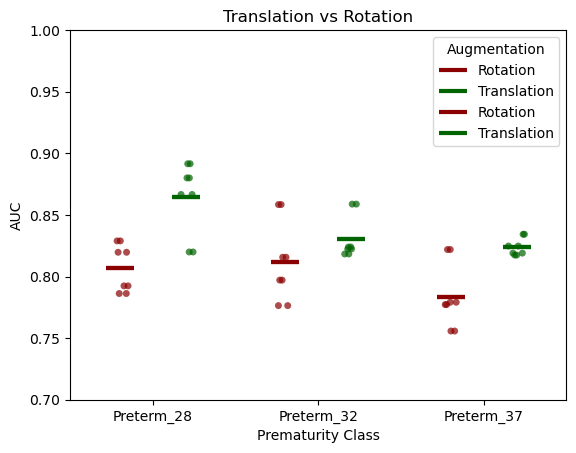

In [192]:
sns.stripplot(
data=df, x="Prematurity Class", y="AUC", hue="Augmentation",
dodge=True, alpha=.7, legend=False,
palette=palette
)
sns.pointplot(
    data=df, x="Prematurity Class", y="AUC", hue="Augmentation",
    dodge=.4, linestyle="none", errorbar=None,
    marker="_", markersize=20, markeredgewidth=3,
    palette=palette
)
#ax.set_title(side_name)
plt.ylim(0.7, 1)
plt.title('Translation vs Rotation')
plt.show()

In [193]:
# plot AUC depending on the learning rate
# use config diff

On peut changer le répertoire dans lequel on cherche les valeurs. Mais config diff ne va pas comparer les dates différentes : il faudrait créer un comparateur de config global ? C'est un peu compliqué... Voir WandB ?

In [23]:
models = '/volatile/jl277509/Runs/02_STS_babies/Program/Output/2024-01-26/'
df_configs = pd.read_csv(models+'config_diff.csv')
df_configs.columns = ['model'] + df_configs.columns.tolist()[1:]

label='Right_PCS'
target = 'train_val_values.json'
metric = 'train_val_auc'

In [24]:
# find existing perf directories
selected_models_dirs = [root for root, dirs, files in os.walk(models)
                            if (target in files) & (label in root) & ('best_model' not in root)]
directories = []
values = []
for idx, directory in enumerate(selected_models_dirs):
    with open(os.path.join(directory,target), 'r') as f:
        perf = json.load(f)
        value = perf[metric][0]
    directories.append(directory)
    values.append(value)

In [25]:
data = {'name': directories, 'value': values}
df_values = pd.DataFrame.from_dict(data)

In [26]:
values_configs = []
mod_names = []
for row in df_configs.iterrows():
    mod_name = row[1].model
    if df_values['name'].str.contains(mod_name + '/').sum() == 1:
        row = df_values[df_values['name'].str.contains(mod_name + '/')]
        val = row.value.tolist()[0]
        values_configs.append(val)
        mod_names.append(mod_name)

In [27]:
data = {'model': mod_names, 'value': values_configs}
df_values = pd.DataFrame.from_dict(data)

In [199]:
df = pd.merge(df_configs, df_values)

In [ ]:
# convert lr to str for stripplot
df['lr']=np.array(df['lr']).astype(str)

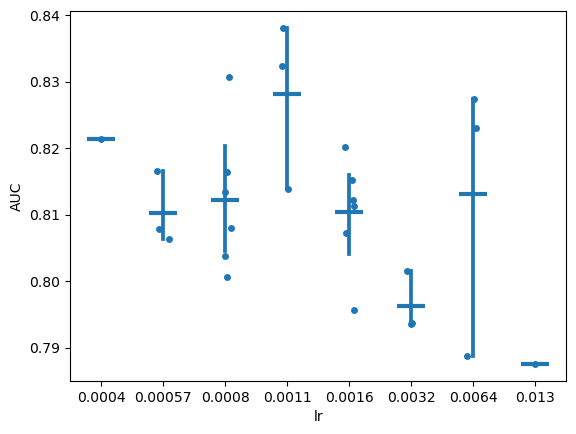

In [222]:
sns.stripplot(data=df, x='lr', y='value')
#plt.xscale('log')
sns.pointplot(
    data=df, x="lr", y="value",
    linestyle="none", errorbar=('ci', 95),
    marker="_", markersize=20, markeredgewidth=3)
plt.ylabel('AUC')
plt.show()

In [35]:
# retrieve the parameters manually when not present in config diff (parameters which were not added to parameters_to_keep...)
# trimdepth max_distance
data = {'model': ['19-06-17_0/', '16-33-55_0/', '19-06-17_1/', '16-33-55_1/', '19-06-17_2/', '16-33-55_2/', '13-09-40_156/', '16-33-55_3/', '19-06-17_3/', '16-33-55_4/', '19-06-17_4/', '16-33-55_4/'],
        'max_distance':range(0,12)}

In [36]:
models_dirs = '/volatile/jl277509/Runs/02_STS_babies/Program/Output/2024-01-31/'

In [37]:
x,y=[],[]
for model, max_dist in zip(data['model'], data['max_distance']):
    print(model, max_dist)
    x.append(max_dist)
    with open(models_dirs+model+'ACC_embeddings/Right_PCS/train_val_values.json', 'r') as f:
        auc = json.load(f)
    auc = auc['train_val_auc'][0]
    y.append(auc)

19-06-17_0/ 0
16-33-55_0/ 1
19-06-17_1/ 2
16-33-55_1/ 3
19-06-17_2/ 4
16-33-55_2/ 5
13-09-40_156/ 6
16-33-55_3/ 7
19-06-17_3/ 8
16-33-55_4/ 9
19-06-17_4/ 10
16-33-55_4/ 11


In [38]:
x.append(-1)
with open('/volatile/jl277509/Runs/02_STS_babies/Program/Output/2024-02-01/11-59-39_147/ACC_embeddings/Right_PCS/train_val_values.json', 'r') as f:
    auc = json.load(f)
    auc = auc['train_val_auc'][0]
    y.append(auc)

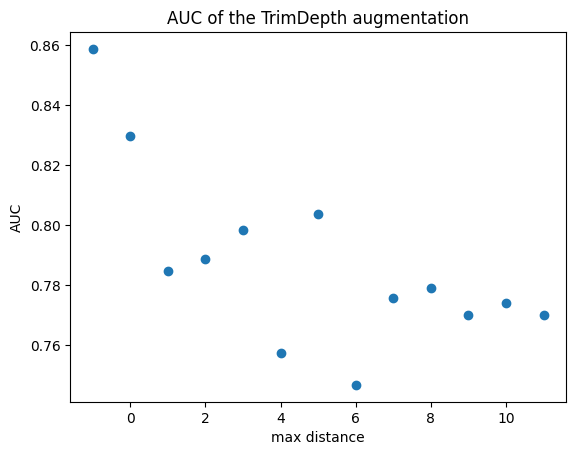

In [40]:
fig,ax = plt.subplots()
ax.scatter(x,y)
ax.set_xlabel('max distance')
ax.set_ylabel('AUC')
ax.set_title('AUC of the TrimDepth augmentation')
plt.show()

In [18]:
models_dirs = '/volatile/jl277509/Runs/02_STS_babies/Program/Output/translation_magnitude/'
labels=['Right_PCS','Age_64', 'Age', 'Sex']
#labels=['Right_PCS', 'Age_64']
#labels=['Right_PCS']
target='train_val_values.json'
metric = 'train_val_auc'
embeddings = ['ACC_1','UKB_5percent','UKB_5percent', 'UKB_5percent']
#model_name = 'translation'
model_name = ''
df_list=[]
for label, embedding in zip(labels, embeddings):
    dict_values={}
    selected_models_dirs = [root for root, dirs, files in os.walk(models_dirs, followlinks=True)
                                if (target in files) & (root.endswith(label)) & (embedding in root) & (model_name in root) & ('best_model' not in root)]
    print(f'{label}: {selected_models_dirs}')
    dict_values = {'model': [], label: []}
    for directory in selected_models_dirs:
        with open(os.path.join(directory,target), 'r') as f:
            perf = json.load(f)
            if isinstance(perf[metric], float):
                value = perf[metric]
            else:
                value = perf[metric][0]
            name = directory.replace(models_dirs, '').split('/')[0]
            dict_values['model'].append(name)
            dict_values[label].append(value)
    df = pd.DataFrame.from_dict(dict_values)
    df_list.append(df)

Right_PCS: ['/volatile/jl277509/Runs/02_STS_babies/Program/Output/translation_magnitude/translation_only_no_noise_2_1/ACC_1_embeddings/Right_PCS', '/volatile/jl277509/Runs/02_STS_babies/Program/Output/translation_magnitude/translation_only_no_noise_2_4/ACC_1_embeddings/Right_PCS', '/volatile/jl277509/Runs/02_STS_babies/Program/Output/translation_magnitude/translation_only_no_noise_3_4/ACC_1_embeddings/Right_PCS', '/volatile/jl277509/Runs/02_STS_babies/Program/Output/translation_magnitude/translation_only_no_noise_3_0/ACC_1_embeddings/Right_PCS', '/volatile/jl277509/Runs/02_STS_babies/Program/Output/translation_magnitude/translation_only_no_noise_4/ACC_1_embeddings/Right_PCS', '/volatile/jl277509/Runs/02_STS_babies/Program/Output/translation_magnitude/translation_only_no_noise_0/ACC_1_embeddings/Right_PCS', '/volatile/jl277509/Runs/02_STS_babies/Program/Output/translation_magnitude/translation_only_no_noise_3_1/ACC_1_embeddings/Right_PCS', '/volatile/jl277509/Runs/02_STS_babies/Program/

In [19]:
label

'Sex'

In [20]:
df=pd.concat(df_list,axis=1).T.drop_duplicates().T
df=df.sort_values(by='model').reset_index(drop=True)
l=df['model'].tolist()
df['model']=[elem[:-2] for elem in l]

In [21]:
df

,model,Right_PCS,Age_64,Age,Sex
0,translation_only_no_noise,0.793521,0.519509,0.5246,0.579336
1,translation_only_no_noise,0.843141,0.503737,0.5044,0.59531
2,translation_only_no_noise,0.830014,0.508682,0.5193,0.58936
3,translation_only_no_noise_2,0.444451,0.552141,0.5319,0.586869
4,translation_only_no_noise_2,0.453085,0.547713,0.5275,0.596247
5,translation_only_no_noise_2,0.814282,0.547016,0.5231,0.545496
6,translation_only_no_noise_2,0.446141,0.517121,0.5164,0.584933
7,translation_only_no_noise_2,0.531859,0.535142,0.5125,0.596981
8,translation_only_no_noise,0.829493,0.539553,0.5186,0.57762
9,translation_only_no_noise_3,0.608028,0.555985,0.536,0.539736


In [22]:
df['balanced_Age_64'] = (df['Right_PCS'].to_numpy()+ np.minimum(np.ones(len(df['Age_64']))-df['Age_64'].to_numpy(),0.5)) / 2
df['balanced_Age'] = (df['Right_PCS'].to_numpy()+ np.minimum(np.ones(len(df['Age']))-df['Age'].to_numpy(),0.5)) / 2
#df['balanced2'] = [(np.mean(df.loc[df['model']==model]['Right_PCS'].to_numpy())
#                   +np.mean(np.minimum(np.ones(len(df.loc[df['model']==model]))-df.loc[df['model']==model]['Age_64'].to_numpy(),0.5))
#                   -np.std(df.loc[df['model']==model]['Right_PCS'].to_numpy())
#                   -np.std(df.loc[df['model']==model]['Age_64'].to_numpy())
#)/2 for model in df['model'].tolist()]

plt.close()
fig, ax = plt.subplots(figsize=(15,10))
for idx, label in enumerate(labels):
    sns.violinplot(data=df, x='model', y=label, label=label, inner='point')
    sns.despine(offset=0, trim=False, ax=ax)
    #sns.stripplot(data=df, x='model', y=label, marker='v',ax=ax)
    #sns.pointplot(
    #    data=df, x="model", y=label,
    #    linestyles="", errorbar=None,
    #    marker="s", markersize=10, markeredgewidth=2,ax=ax,label=label,scale=1.2)
    plt.ylabel('AUC')
    #plt.xticks(rotation=15)
    offset = mtrans.ScaledTranslation(0.3*idx, 0, ax.figure.dpi_scale_trans)
    nb_coll = len(ax.collections)
    start_offset_idx, end_offset_idx = idx*nb_coll // len(labels), (idx+1)*nb_coll // len(labels)
    for k in range(start_offset_idx, end_offset_idx): #don't really understand the collection organization
        #first offset the points
        trans = ax.collections[k].get_transform()
        ax.collections[k].set_transform(trans + offset)
    #offset the errorbars
    offset = mtrans.ScaledTranslation(0.3*idx, 0, ax.figure.dpi_scale_trans)
    nb_lines = len(ax.lines)
    start_offset_idx, end_offset_idx = idx*nb_lines // len(labels), (idx+1)*nb_lines // len(labels)
    for k in range(start_offset_idx, end_offset_idx):
        trans = ax.lines[k].get_transform()
        ax.lines[k].set_transform(trans + offset)
#handles, labels = plt.gca().get_legend_handles_labels()
#by_label = OrderedDict(zip(labels, handles))
#plt.legend(by_label.values(), by_label.keys())
#plt.legend()
plt.ylim(0.45,1)
plt.show()

/tmp/ipykernel_4051704/2859316536.py:10: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(
/tmp/ipykernel_4051704/2859316536.py:10: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(
/tmp/ipykernel_4051704/2859316536.py:10: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(
/tmp/ipykernel_4051704/2859316536.py:10: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib

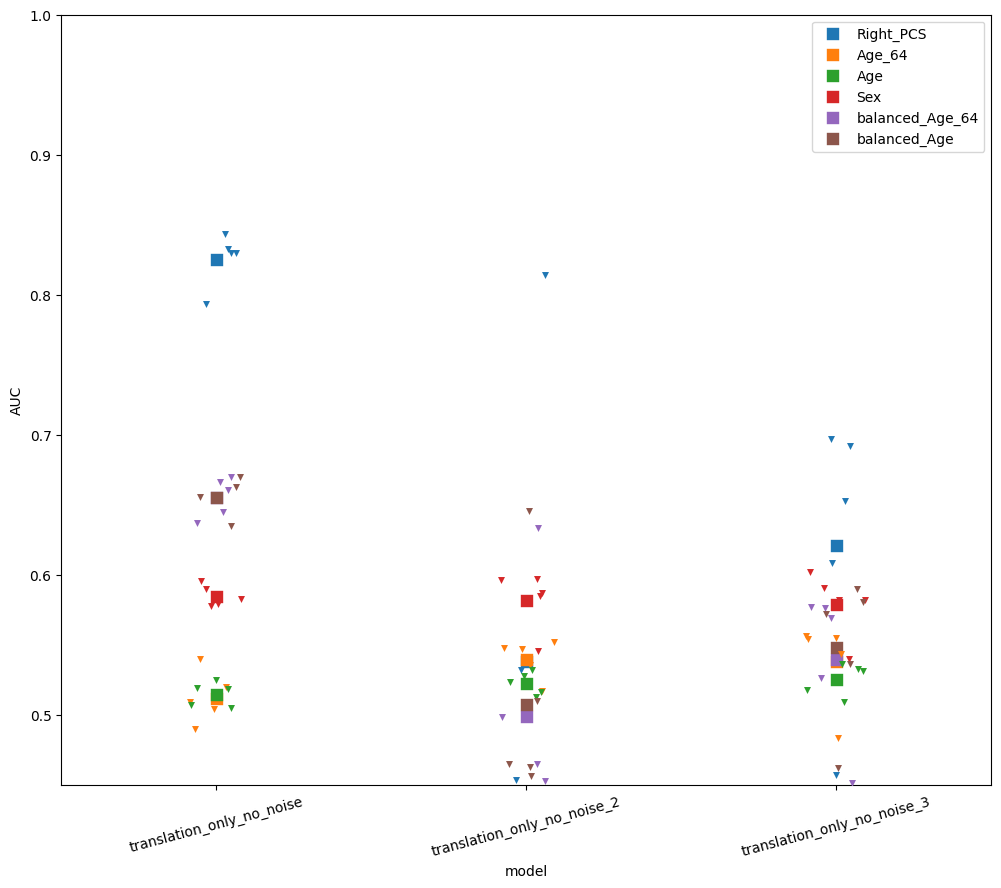

In [23]:
plt.close()
labels=df.keys().tolist()
labels.remove('model')
off=0
fig, ax = plt.subplots(figsize=(12,10))
for idx, label in enumerate(labels):
    #sns.violinplot(data=df, x='model', y=label, label=label, inner='point')
    #sns.despine(offset=0, trim=False, ax=ax)
    sns.stripplot(data=df, x='model', y=label, marker='v',ax=ax)
    sns.pointplot(
        data=df, x="model", y=label,
        linestyles="", errorbar=None,
        marker="s", markersize=10, markeredgewidth=2,ax=ax,label=label,scale=1.2)
    plt.ylabel('AUC')
    plt.xticks(rotation=15)
    offset = mtrans.ScaledTranslation(off*idx, 0, ax.figure.dpi_scale_trans)
    nb_coll = len(ax.collections)
    start_offset_idx, end_offset_idx = idx*nb_coll // len(labels), (idx+1)*nb_coll // len(labels)
    for k in range(start_offset_idx, end_offset_idx): #don't really understand the collection organization
        #first offset the points
        trans = ax.collections[k].get_transform()
        ax.collections[k].set_transform(trans + offset)
    #offset the errorbars
    offset = mtrans.ScaledTranslation(off*idx, 0, ax.figure.dpi_scale_trans)
    nb_lines = len(ax.lines)
    start_offset_idx, end_offset_idx = idx*nb_lines // len(labels), (idx+1)*nb_lines // len(labels)
    for k in range(start_offset_idx, end_offset_idx):
        trans = ax.lines[k].get_transform()
        ax.lines[k].set_transform(trans + offset)
plt.legend()
plt.ylim(0.45,1)
plt.show()

In [111]:
# visu when model root names are identical
# for one folder
# take all models
# gather by roots
# plot all perfs by metric: PCS, age, Sex (use stripplot etc...)
# simply label with model names...

In [10]:
df_configs = pd.read_csv(models_dirs+'config_diff.csv')
df_configs.columns = ['model'] + df_configs.columns.tolist()[1:]

In [11]:
#mods = df_configs.loc[df_configs['percentage']==30]['model']
#mods = df_configs.loc[df_configs['patch_size']=='[1, 11, 25, 25]']['model']
mods = df['model'].tolist()
val_list=[]
for model in mods:
    val = df.loc[df['model'].str.contains(model)][label].tolist()[0]
    val_list.append(val)
print(val_list)
print(np.mean(val_list))
print(np.std(val_list))

[0.556401134911602, 0.5689784869089667, 0.5336122711966714, 0.5650442056285407, 0.5698204011745022, 0.5426680184707184, 0.5444272245550479, 0.5397538894684608]
0.5525882040393139
0.013346805487133257
